importar las librerias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#leer las dos csv

In [4]:
dataset_datos_completos = pd.read_csv('proyecto1.csv')
dataset_datos_catalogos = pd.read_csv('Catalogo_sucursal.csv')


df_unido = pd.merge(dataset_datos_completos, dataset_datos_catalogos, on='id_sucursal', how='inner')

#1.- Ventas totales del comercio

In [5]:
total_venta = sum(df_unido['ventas_tot'])
print(f'total de ventas {total_venta}')

total de ventas 1822223747


#2.- Gentes con adeudos y sin adeudos en por centaje

In [6]:
filter_con_adeudos = list(filter(lambda persona : persona == 'Con adeudo', df_unido['B_adeudo']))
filter_sin_adeudos = list(filter(lambda persona : persona == 'Sin adeudo', df_unido['B_adeudo']))

con_adeudos_porcentaje = len(filter_con_adeudos) *100 / (len(df_unido.iloc[:]))
sin_adeudos_porcentaje = len(filter_sin_adeudos) * 100 / len(df_unido.iloc[:])
print(f'Porcentaje de la gente con adeudos {con_adeudos_porcentaje}% \nPorcenta de la gente sin adeudos {sin_adeudos_porcentaje}%')

Porcentaje de la gente con adeudos 45.141950273320404% 
Porcenta de la gente sin adeudos 54.858049726679596%


#3.-Grafica donde se pueda observar las ventas totales respecto del tiempo, en una grafica de barras 

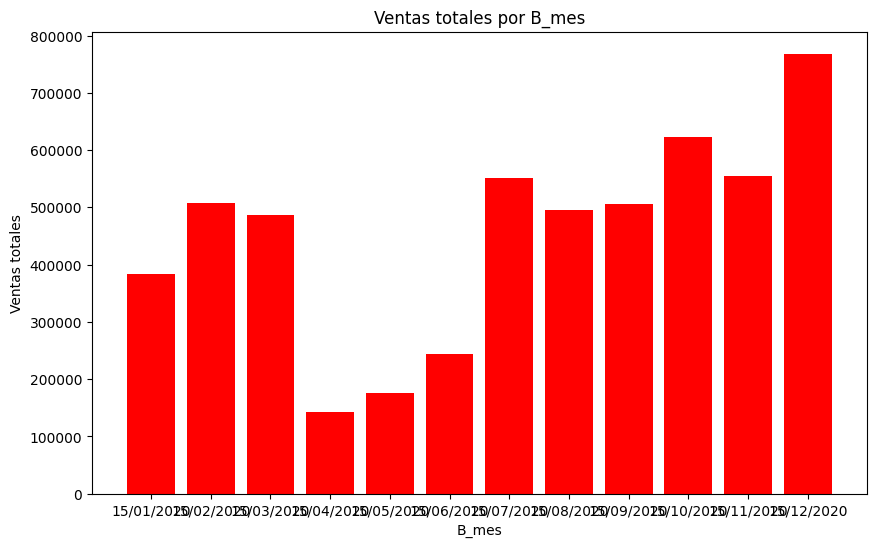

In [7]:
plt.figure(figsize=(10,6))
plt.bar(df_unido['B_mes'],df_unido['ventas_tot'],color = 'red')
plt.xlabel('B_mes')
plt.ylabel('Ventas totales')
plt.title('Ventas totales por B_mes')
plt.show()

#4.-Grafica donde se pueda visualizar la desviación estándar de los pagos realizados del comercio respecto del tiempo

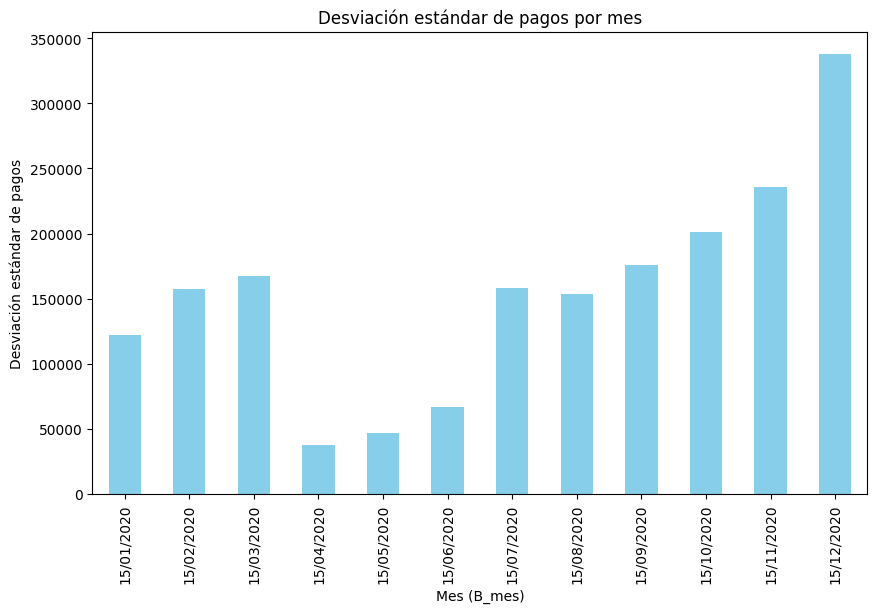

In [8]:
# Calcula la desviación estándar agrupando por 'B_mes', profe aqui no se que hizo, pero encontre que tiene que unir las doscolumnas para sacar su desviacion estandar de valores por usuario en cada fecha
std_by_mes = df_unido.groupby('B_mes')['pagos_tot'].std().sort_index()
# Grafica usando el método de plot de Pandas
plt.figure(figsize=(10,6))
std_by_mes.plot.bar(color='skyblue')
plt.xlabel('Mes (B_mes)')
plt.ylabel('Desviación estándar de pagos')
plt.title('Desviación estándar de pagos por mes')
plt.show()

#5.-Cuanto es la deuda total de los clientes

In [9]:
total_deudos = sum(df_unido['adeudo_actual'])
print(f'el total de deudos es {total_deudos}')

el total de deudos es 81365970.62


# 6.-Cuanto es el porcentaje de utilidad del comercio a partir de el total de las ventas respecto del adeudo 

In [10]:
porcentaje_utilidad = (total_venta - total_deudos) / total_venta *100
print(f'El porcentaje de utilidad es de {porcentaje_utilidad}%')

El porcentaje de utilidad es de 95.53479803158334%


7.-Crear un grafico circular de ventas por sucursal.

In [11]:
print(df_unido)

       Unnamed: 0       B_mes fec_ini_cdto  id_sucursal    B_adeudo  \
0               1  15/01/2020   01/01/2020            1  Con adeudo   
1               2  15/01/2020   01/01/2020            1  Sin adeudo   
2               3  15/01/2020   01/01/2020            2  Con adeudo   
3               4  15/01/2020   01/01/2020            2  Sin adeudo   
4               5  15/01/2020   01/01/2020            3  Con adeudo   
...           ...         ...          ...          ...         ...   
11337       11338  15/12/2020   31/12/2020           15  Sin adeudo   
11338       11339  15/12/2020   31/12/2020           16  Con adeudo   
11339       11340  15/12/2020   31/12/2020           16  Sin adeudo   
11340       11341  15/12/2020   31/12/2020           17  Con adeudo   
11341       11342  15/12/2020   31/12/2020           17  Sin adeudo   

       ventas_tot  no_clientes  adeudo_actual  pagos_tot  no_cdtos   suc  
0           27427            5        9117.21   18442.62        21  CDMX

In [12]:
colores = ["Red", "Blue", "Green", "Yellow", "Orange", "Purple", "Pink",
          "Brown", "Black", "Orange", "Gray", "Violet", "Indigo", "Cyan",
          "Magenta", "Turquoise", "Lime"]

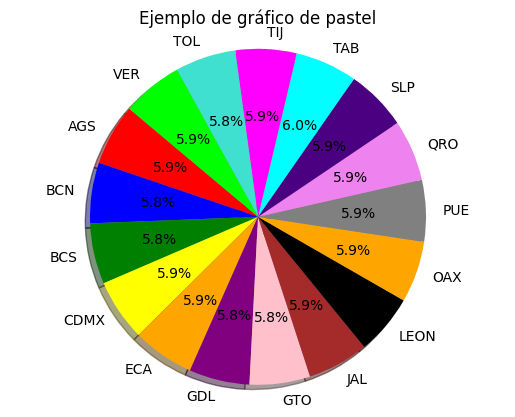

In [13]:
unido_por_sucursal = df_unido.groupby('suc')['ventas_tot'].sum()
plt.pie(unido_por_sucursal.values,labels= unido_por_sucursal.index,colors = colores,autopct = '%1.1f%%',shadow = True,startangle=140)
plt.axis('equal')
plt.title('Ejemplo de gráfico de pastel')
plt.show()


8.-Presentar un grafico de cuales son las deudas totales por cada sucursal respecto del margen de utilidad de cada sucursal.

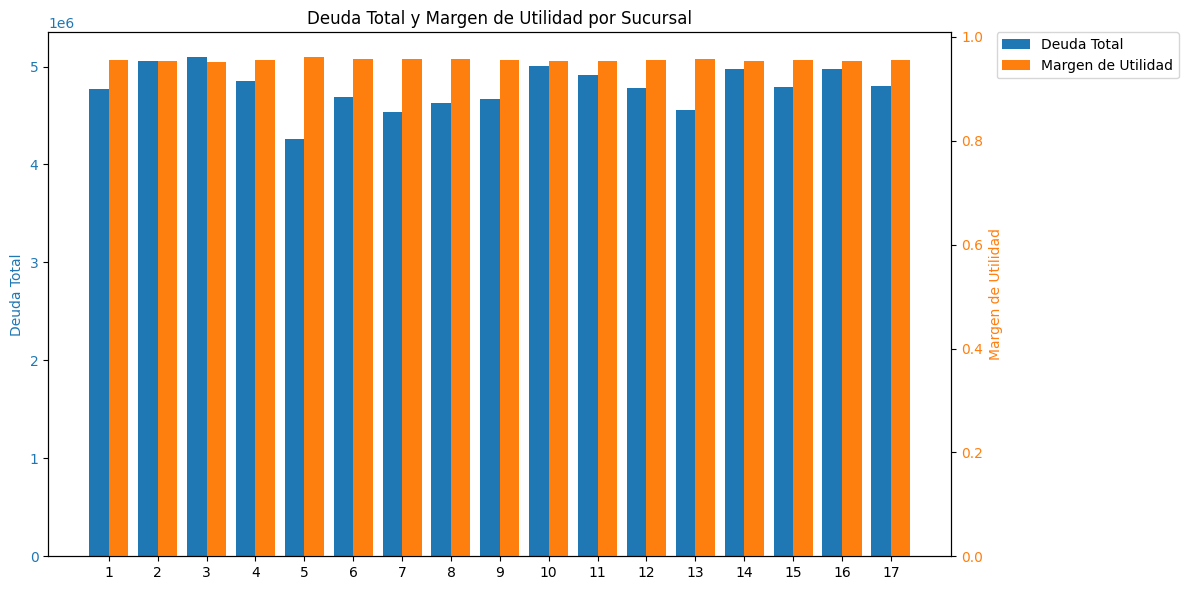

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Datos de ejemplo o agrupación previa (ajusta según tu DataFrame) ---
# Supongamos que ya existe df_unido con tus datos originales.
# Primero agrupamos por sucursal:
df_grouped = df_unido.groupby('id_sucursal').agg({
    'ventas_tot': 'sum',
    'adeudo_actual': 'sum'
}).reset_index()

# Calculamos el margen de utilidad:
df_grouped['margen_utilidad'] = df_grouped.apply(
    lambda row: (row['ventas_tot'] - row['adeudo_actual']) / row['ventas_tot'] if row['ventas_tot'] != 0 else 0,
    axis=1
)

# --- Configuración para el gráfico ---
sucursales = df_grouped['id_sucursal']
adeudo = df_grouped['adeudo_actual']
margen = df_grouped['margen_utilidad']

x = np.arange(len(sucursales))  # Posiciones en el eje X
width = 0.4                     # Ancho de cada barra

fig, ax1 = plt.subplots(figsize=(12, 6))  
ax2 = ax1.twinx()  # Segundo eje Y para el margen de utilidad

# Barras para Deuda Total (eje Y izquierdo)
bar1 = ax1.bar(x - width/2, adeudo, width, label="Deuda Total", color="tab:blue")
ax1.set_ylabel("Deuda Total", color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")

# Barras para Margen de Utilidad (eje Y derecho)
bar2 = ax2.bar(x + width/2, margen, width, label="Margen de Utilidad", color="tab:orange")
ax2.set_ylabel("Margen de Utilidad", color="tab:orange")
ax2.tick_params(axis='y', labelcolor="tab:orange")

# Eje X: nombres de sucursal
plt.xticks(x, sucursales)
plt.xlabel("Sucursal")

# Título
plt.title("Deuda Total y Margen de Utilidad por Sucursal")

# Leyenda fuera del gráfico (a la derecha)
bars = [bar1, bar2]
labels = ["Deuda Total", "Margen de Utilidad"]
ax1.legend(bars, labels, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Ajustar los márgenes para que no se corte nada
plt.tight_layout()

# Mostrar la gráfica
plt.show()
